### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

#### Loading Libraries
Loading foundamental Libraries to the project.

In [218]:
library(lubridate)
library(dplyr)
library(ggplot2)

#### Loading CSV  

I load the CSV files into their respective dataframes.

In [97]:
ny = read.csv('new-york-city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

#### Data Analysis and Schema  

I perform a preliminary analysis of the 3 initial datasets using the summary function that is a build in R function.

##### New York

In [8]:
summary(ny)

       X            Start.Time          End.Time         Trip.Duration      
 Min.   :     33   Length:300000      Length:300000      Min.   :     61.0  
 1st Qu.:1707416   Class :character   Class :character   1st Qu.:    368.0  
 Median :3405756   Mode  :character   Mode  :character   Median :    609.0  
 Mean   :3407026                                         Mean   :    899.7  
 3rd Qu.:5108762                                         3rd Qu.:   1054.0  
 Max.   :6816152                                         Max.   :2155775.0  
                                                                            
 Start.Station      End.Station         User.Type            Gender         
 Length:300000      Length:300000      Length:300000      Length:300000     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

##### Washington

In [9]:
summary(wash)

       X            Start.Time          End.Time         Trip.Duration      
 Min.   :      7   Length:300000      Length:300000      Min.   :     60.0  
 1st Qu.: 436394   Class :character   Class :character   1st Qu.:    410.6  
 Median : 875064   Mode  :character   Mode  :character   Median :    706.5  
 Mean   : 875404                                         Mean   :   1237.3  
 3rd Qu.:1313148                                         3rd Qu.:   1229.4  
 Max.   :1751446                                         Max.   :1235662.2  
 Start.Station      End.Station         User.Type        
 Length:300000      Length:300000      Length:300000     
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

##### Chicago

In [10]:
summary(chi)

       X            Start.Time          End.Time         Trip.Duration    
 Min.   :      4   Length:300000      Length:300000      Min.   :   60.0  
 1st Qu.: 387137   Class :character   Class :character   1st Qu.:  393.0  
 Median : 777104   Mode  :character   Mode  :character   Median :  670.0  
 Mean   : 776346                                         Mean   :  936.2  
 3rd Qu.:1164065                                         3rd Qu.: 1125.0  
 Max.   :1551500                                         Max.   :86224.0  
                                                                          
 Start.Station      End.Station         User.Type            Gender         
 Length:300000      Length:300000      Length:300000      Length:300000     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

From this analysis, the following points are evident:
- New York: The Birth.Year variable has 28,220 missing values.
- Chicago: The Birth.Year variable has 61,019 missing values, which represent a significant percentage of the total.
- Washington: There is a complete lack of information on Gender and Birth.Year, limiting the analysis to only trip and station data.

#### Data Cleaning and Final Dataset Construction


Below is the code I will use to merge the 3 dataframes, standardizing and homogenizing the fields to obtain a final dataset that includes all essential information.

##### New York cleaning and standardizzation

In [150]:
names(ny)[names(ny) == "X"] <- "Trip.id"
ny$Birth.Year <- as.integer(ny$Birth.Year)
ny$City <- rep('New York', times = nrow(ny))
ny$Start.Time <- ymd_hms(ny$Start.Time)
ny$End.Time <- ymd_hms(ny$End.Time)
ny$Gender <- case_when(
    is.null(ny$Gender)  ~ NA,
    ny$Gender == '' ~ NA,
    TRUE ~ ny$Gender
)
ny$Birth.Year <- case_when(
    is.null(ny$Birth.Year)  ~ NA,
    TRUE ~ ny$Birth.Year
)

##### Washington cleaning and standardizzation

In [151]:
names(wash)[names(wash) == "X"] <- "Trip.id"
wash$Trip.Duration <- as.integer(wash$Trip.Duration)
wash$Gender <- as.character(rep(NA, times = nrow(wash)))
wash$Birth.Year <- as.integer(rep(NA, times = nrow(wash)))
wash$City <- rep('Washington', times = nrow(wash))
wash$Start.Time <- ymd_hms(wash$Start.Time)
wash$End.Time <- ymd_hms(wash$End.Time)

##### Chicago cleaning and standardizzation

In [148]:
names(chi)[names(chi) == "X"] <- "Trip.id"
chi$Birth.Year <- as.integer(chi$Birth.Year)
chi$City <- rep('Chicago', times = nrow(chi))
chi$Start.Time <- ymd_hms(chi$Start.Time)
chi$End.Time <- ymd_hms(chi$End.Time)
chi$Gender <- case_when(
    is.null(chi$Gender)  ~ NA,
    chi$Gender == '' ~ NA,
    TRUE ~ chi$Gender
)
chi$Birth.Year <- case_when(
    is.null(chi$Birth.Year)  ~ NA,
    TRUE ~ chi$Birth.Year
)

In [182]:
final_ds <- data.frame()
final_ds <- rbind(ny,wash,chi)
summary(final_ds)

    Trip.id          Start.Time                    
 Min.   :      4   Min.   :2017-01-01 00:07:57.00  
 1st Qu.: 551291   1st Qu.:2017-03-10 07:18:00.00  
 Median :1102220   Median :2017-04-28 07:06:29.50  
 Mean   :1686259   Mean   :2017-04-20 13:55:05.85  
 3rd Qu.:1742392   3rd Qu.:2017-06-03 01:16:15.75  
 Max.   :6816152   Max.   :2017-06-30 23:59:01.00  
                   NA's   :8                       
    End.Time                      Trip.Duration     Start.Station     
 Min.   :2017-01-01 00:14:00.00   Min.   :     60   Length:900000     
 1st Qu.:2017-03-10 07:30:00.00   1st Qu.:    389   Class :character  
 Median :2017-04-28 07:15:36.00   Median :    660   Mode  :character  
 Mean   :2017-04-20 14:09:57.41   Mean   :   1024                     
 3rd Qu.:2017-06-03 01:22:04.75   3rd Qu.:   1135                     
 Max.   :2017-07-08 14:30:26.00   Max.   :2155775                     
 NA's   :10                                                           
 End.Station    

### Question 1

By dividing the day into 3-hour time slots, which time slot has the most trips?

In [212]:
# Filtrare le righe valide
q1_ds <- final_ds %>% 
  filter(!is.na(Start.Time))

# Creare una nuova colonna con intervalli di ore usando cut()
q1_ds$Start.Range.Hour <- cut(hour(q1_ds$Start.Time), 
                              breaks = c(-1, 3, 6, 9, 12, 15, 18, 21, 24), 
                              labels = c("0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"), 
                              right = FALSE)

# Rimuovere eventuali valori NA nella colonna Start.Range.Hour
q1_ds <- q1_ds %>% filter(!is.na(Start.Range.Hour))

# Selezionare solo le colonne necessarie
q1_ds <- q1_ds %>% select(Trip.id, Start.Range.Hour)

In [207]:
q1_ds_group <- q1_ds %>%
  group_by(Start.Range.Hour) %>%
  summarize(Trips.Cnt = n()) %>%
  arrange( Start.Range.Hour)
print(q1_ds_group)

# A tibble: 8 × 2
  Start.Range.Hour Trips.Cnt
  <fct>                <int>
1 0-3                  31853
2 3-6                  56443
3 6-9                 180982
4 9-12                140415
5 12-15               133977
6 15-18               184066
7 18-21               131028
8 21-24                41228


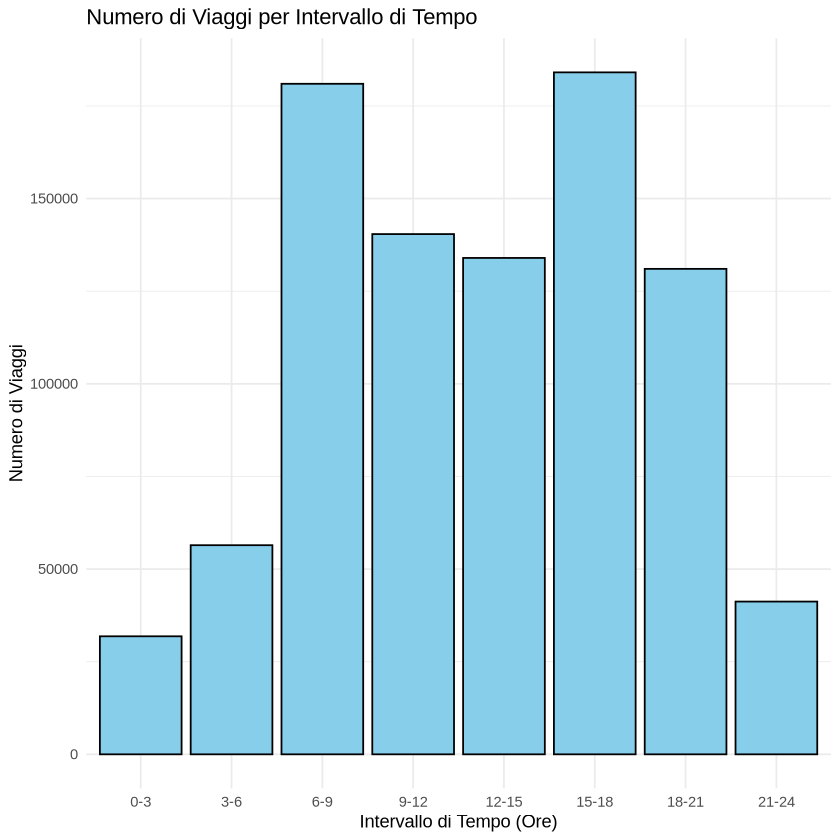

In [208]:
# Creare il grafico a colonne
ggplot(q1_ds_group, aes(x = Start.Range.Hour, y = Trips.Cnt)) +
  geom_col(fill = "skyblue", color = "black") +
  labs(
    title = "Numero di Viaggi per Intervallo di Tempo",
    x = "Intervallo di Tempo (Ore)",
    y = "Numero di Viaggi"
  ) +
  theme_minimal()

The two time slots with peaks on weekdays are:
- 6 AM to 9 AM: 180,982 trips.
- 3 PM to 6 PM: 184,066 trips.
The "M" shape of this graph is common in the automotive field as these time slots indicate travel related to work commitments.

### Question 2

Does the volume of trips vary on average between weekdays and weekends?

In [209]:
# Creo la colonna Start.Range.Hour per categorizzare ogni trip
q2_ds <- data.frame()
q2_ds <- rbind(q2_ds,final_ds %>% select(Trip.id,Start.Time))
q2_ds$Start.Date <- floor_date(q2_ds$Start.Time, unit="day")
q2_ds$Day.Type <- ifelse(wday(q2_ds$Start.Time) %in% c(1, 7), 'Holiday', 'Workday')
q2_ds <- q2_ds %>% select(Trip.id,Start.Date,Day.Type)

In [210]:
q2_ds_group <- q2_ds %>%
  group_by(Start.Date, Day.Type) %>%
  summarize(Trips.Cnt = n(), .groups = "drop_last")  %>%
  group_by(Day.Type) %>%
  summarize(Trips.Daily.Mean = mean(Trips.Cnt)) 

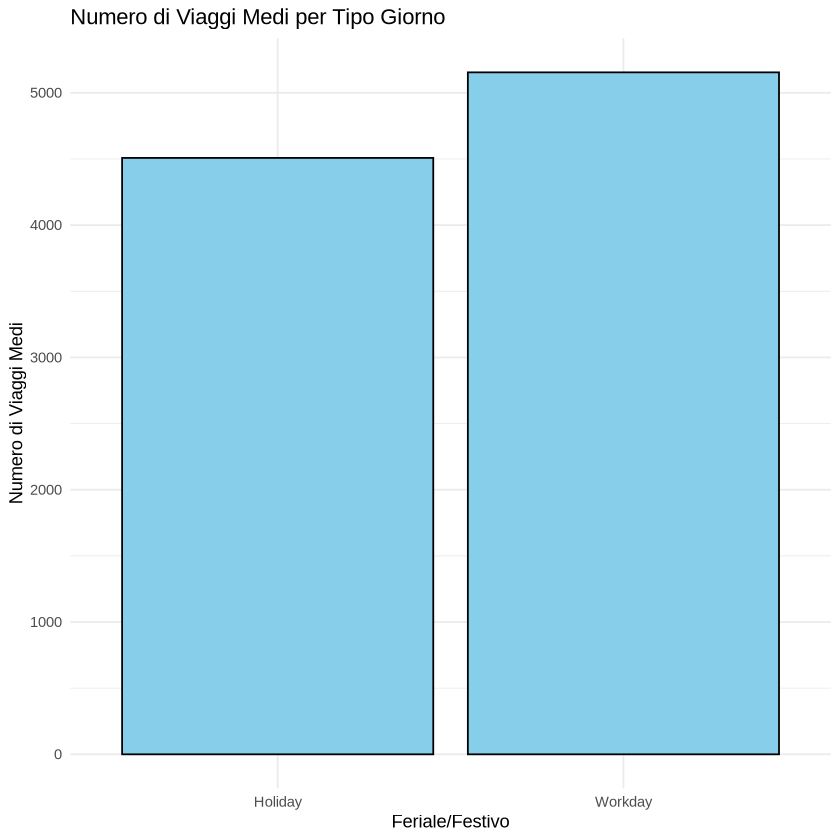

In [157]:
ggplot(q2_ds_group, aes(x = Day.Type, y = Trips.Daily.Mean)) +
  geom_col(fill = "skyblue", color = "black") +
  labs(
    title = "Numero di Viaggi Medi per Tipo Giorno",
    x = "Feriale/Festivo",
    y = "Numero di Viaggi Medi"
  ) +
  theme_minimal()

As evidenced by the graph, the average volume of trips per day varies between weekdays and weekends. On weekends, people tend to take fewer trips compared to weekdays.

### Question 3

Based on the available data, where is the driver target concentrated in terms of age group and gender?

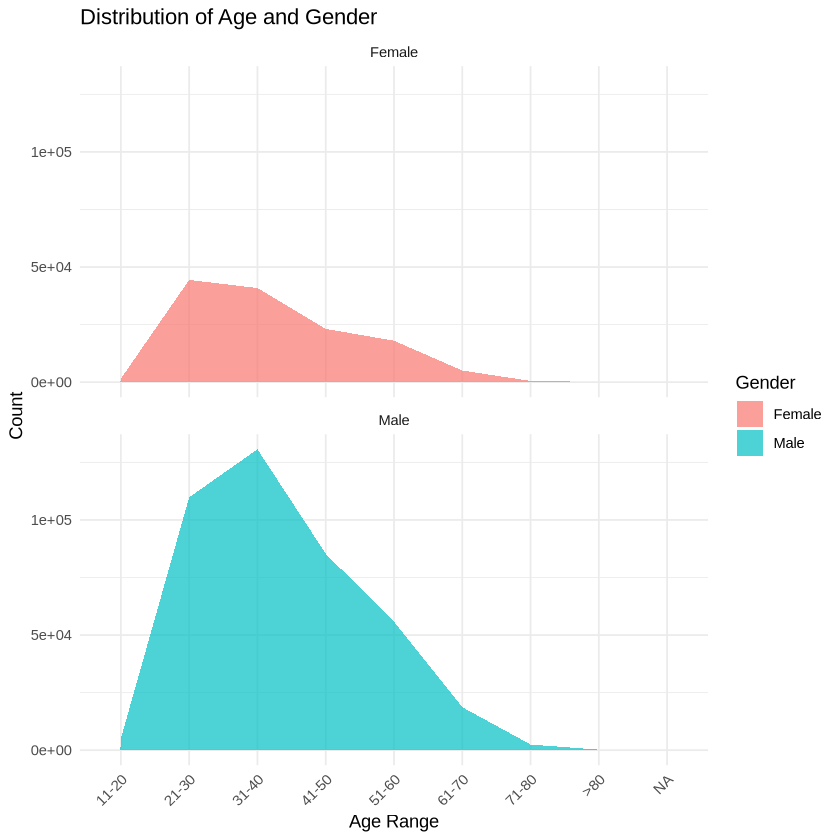

In [211]:
q3_ds <- final_ds %>% filter(!is.na(Gender) & !is.na(Birth.Year))
q3_ds$Age <- year(q3_ds$Start.Time) - q3_ds$Birth.Year

q3_ds$Age_Range <- cut(q3_ds$Age, 
                       breaks = c(-Inf, 10, 20, 30, 40, 50, 60, 70, 80, Inf), 
                       labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"))

distribution <- q3_ds %>%
  group_by(Age_Range, Gender) %>%
  summarise(Count = n(), .groups = 'drop')

ggplot(distribution, aes(x = Age_Range, y = Count, fill = Gender, group = Gender)) +
  geom_area(position = "stack", alpha = 0.7) +
  facet_wrap(~ Gender, ncol = 1) +
  labs(title = "Distribution of Age and Gender",
       x = "Age Range",
       y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


The graphs show that the primary target of our users is males aged between 31 and 40 years.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [226]:
system('python -m nbconvert --to pdf Explore_bikeshare_data.ipynb')